In [1]:
# import pandas module 
import pandas as pd 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
movies_df = pd.read_pickle("movies_tmdb.pkl")

In [5]:
# Keep only non-zero budget and revenue rows.
movies_df = movies_df.query('budget > 0 and revenue > 0')
print(movies_df.shape)
movies_df.head(2)


(4974, 25)


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/Yc9q6QuWrMp9nuDm5R8ExNqbEq.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,en,Avatar,...,2009-12-15,2920357254,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.542,27004
3,False,/Avbc5QFUFMpN6RiPgFyRB4RshUP.jpg,None,123000000,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",,8871,tt0170016,en,How the Grinch Stole Christmas,...,2000-11-15,345823040,104,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,He puts the mean in green.,How the Grinch Stole Christmas,False,6.737,6243


In [20]:
#Statistiques descriptives des variables quantitatives
movies_df_quanti = movies_df[['revenue','budget','runtime','popularity','vote_average','vote_count']]
movies_df_quanti.describe()

,revenue,budget,runtime,popularity,vote_average,vote_count
count,4.974000e+03,4.974000e+03,4974.000000,4974.000000,4974.000000,4974.000000
mean,9.319040e+07,3.194401e+07,109.555086,23.981217,6.532609,2132.472256
std,1.623132e+08,3.864073e+07,20.720990,51.778598,0.806128,3213.418697
min,1.000000e+00,5.000000e+00,5.000000,5.918000,1.800000,2.000000
25%,1.153029e+07,7.000000e+06,95.000000,13.134250,6.017000,405.000000
50%,3.768506e+07,1.980000e+07,105.000000,17.798500,6.547500,975.000000
75%,1.039066e+08,4.000000e+07,120.000000,26.363250,7.100000,2417.250000
max,2.920357e+09,3.800000e+08,254.000000,3424.983000,8.716000,32780.000000


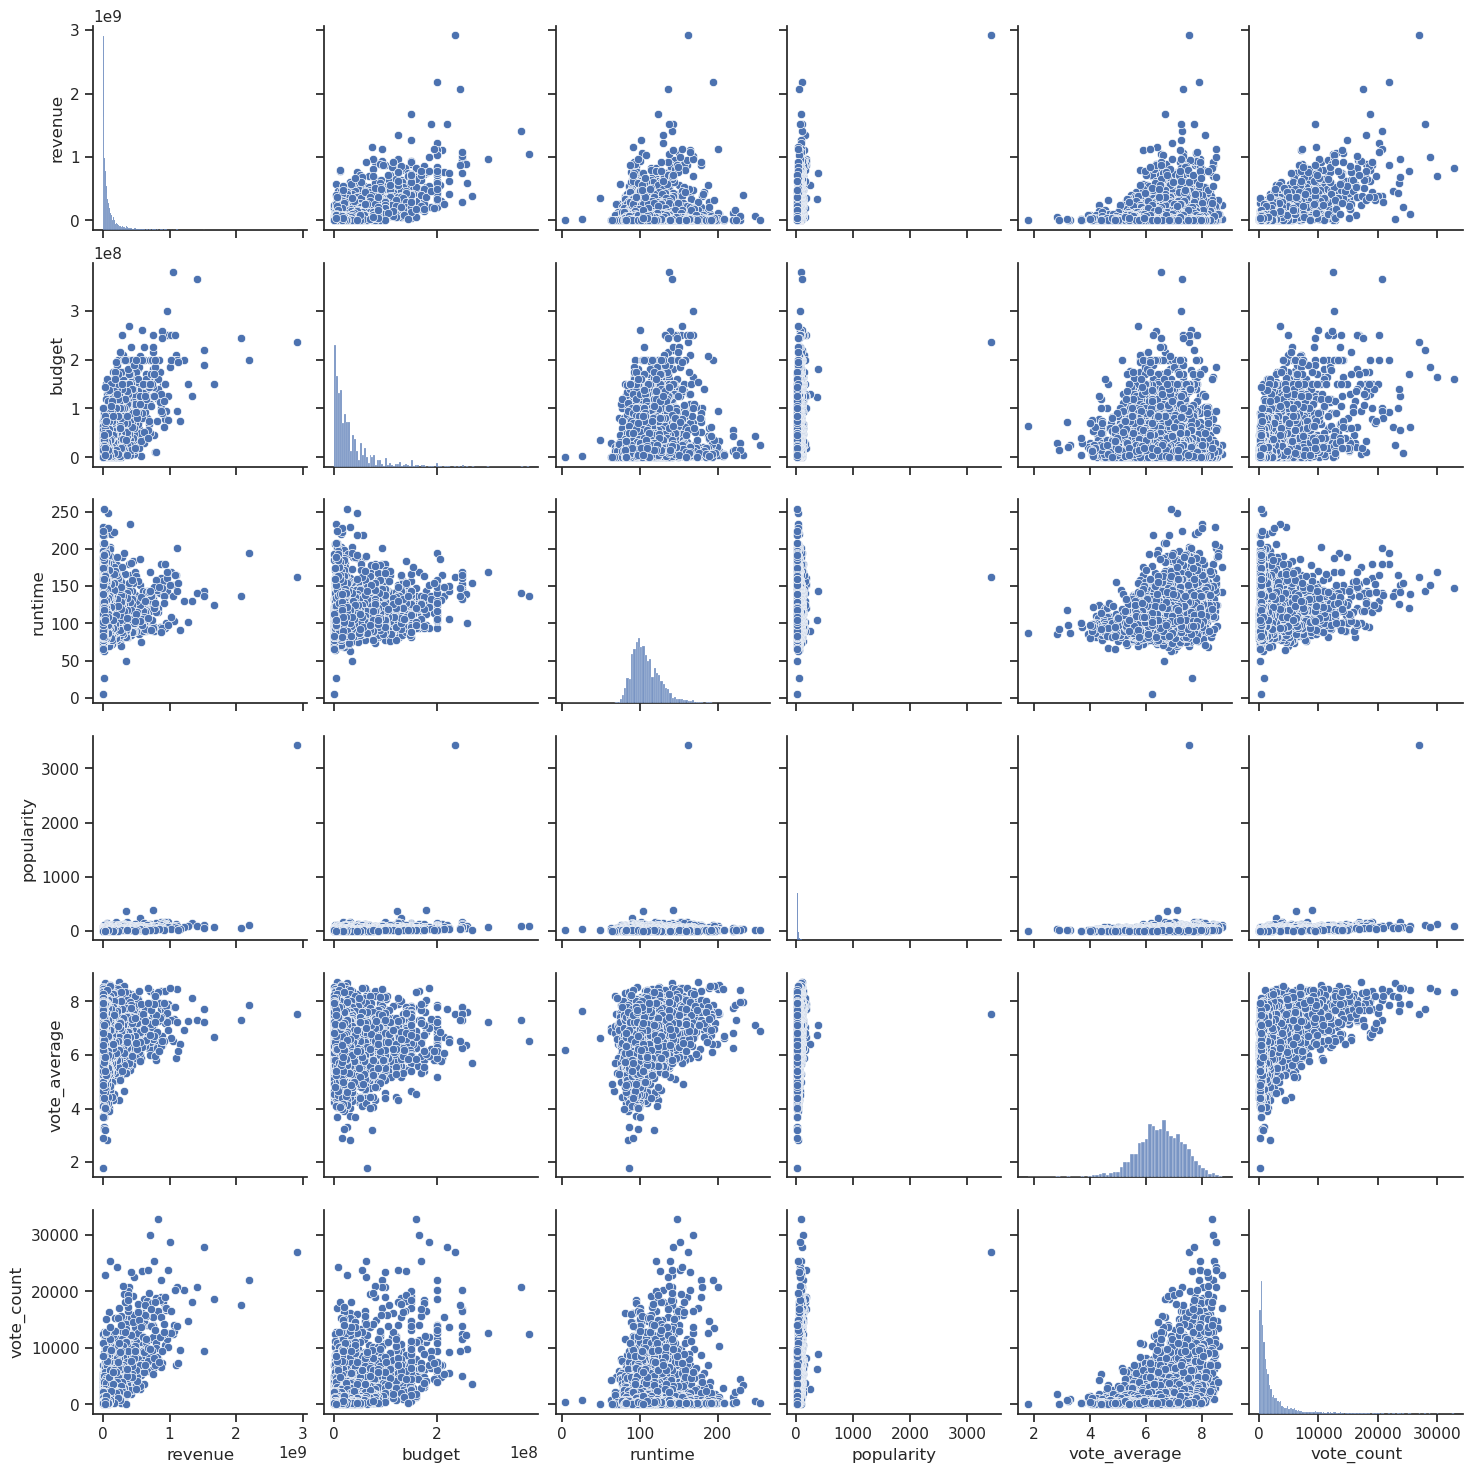

In [21]:
# Liens entre les variables quantitatives
sns.set(style="ticks", color_codes=True)
sns.pairplot(movies_df_quanti)
plt.show()

In [ ]:
#Lien entre budget et recette

sns.set()
x = np.array(movies_df["budget"])
y = np.array(df["Revenu"])
fig = plt.figure(1, figsize=(10, 8))
#plt.plot([0,400000000],[0,1300000000],c="green")
sns.regplot(x, y)
plt.xlabel("budget", fontsize=10)  
plt.ylabel("revenue", fontsize=10)
plt.title("Link between revenue and budget", fontsize=10)


In [ ]:
df.loc[:,['Popularity','Runtime','Revenu','Budget','Vote_average','Vote_count']]

In [ ]:
sns.heatmap(df.loc[:,['Popularity','Runtime','Revenu','Budget','Vote_average','Vote_count']].corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);
plt.title("Matrice de corrélation entre les différentes caractéristiques des films\n", fontsize=18, color='#009432')

In [ ]:
sns.set(style="ticks", color_codes=True)
df2 = df.loc[:,['Popularity','Runtime','Revenu','Budget','Vote_average','Vote_count']]
g = sns.pairplot(df2)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = plt.subplot(111,projection = '3d')
ax.scatter(df['Budget'],df['Runtime'],df['Popularity'], c = df['Revenu'], marker = 'o', s = 100)
ax.set_xlabel('Budget of the Movie',fontsize=15)
ax.set_ylabel('Runtime of the Movie',fontsize=15)
ax.set_zlabel('Popularity of the Movie',fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(15,12)) 
a1 = sns.swarmplot(x='Original_language', y='Revenu', 
                   data=df[(df['Original_language'].isin((df['Original_language'].value_counts()[:10].index.values)))])
a1.set_title("Plot revenue by original language in the movie", fontsize=20) 
a1.set_xticklabels(a1.get_xticklabels(),rotation=45) 
a1.set_xlabel('Original language', fontsize=18)
a1.set_ylabel('Revenu', fontsize=18) 

plt.show()

In [ ]:
#Créer une variable qui ne conserve que l'année
plt.figure(figsize=(15,8))
sns.countplot(df.Release_date.year)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Amount of movies launched every year')

sns.catplot(x='release_day',y='revenue',data=trainData)

In [ ]:
#nettoyer production country
sns.set(rc = {'figure.figsize':(15,8)})
sns.catplot(x='production_country',y='revenue',data=trainData)

In [ ]:
#faire le wordcloud uniquement sur les films qui dépassent un certain budget, pour pouvoir dire : les films qui réussisent le mieux contiennent ces mots
from wordcloud import WordCloud
plt.figure(figsize = (12, 12))
text = ' '.join(df['Tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

In [ ]:
revenue_df = df[['Titre', 'Revenu']].sort_values('Revenu')
print(len(revenue_df[revenue_df.Revenu<2e4]))
revenue_boxplot = revenue_df[['Revenu']][revenue_df.Revenu < 1e6]
plt.figure(figsize=(20,10))
sns.distplot(revenue_boxplot)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Box plot of revenues')
plt.legend()
plt.show()

In [ ]:
budget_df = df[['Titre', 'Budget']].sort_values('Budget')
print(len(budget_df[budget_df.Budget<1e5]))
budget_boxplot = budget_df[['Budget']][budget_df.Budget < 1e9]
plt.figure(figsize=(20,10))
sns.distplot(budget_boxplot)
plt.title('Distribution of Budget')
plt.legend()
plt.show()